In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from topoflow.components import snow_energy_balance 

Importing TopoFlow packages:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
   topoflow.gui (unfinished)
 
 
Paths for this package:
framework_dir = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/framework/
parent_dir    = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/
examples_dir  = /Users/elja0262/Google Drive/active_projects/Topoflow_all/topoflow/topoflow/examples/
__file__      = topoflow/framework/emeli.pyc
__name__      = topoflow.framework.emeli
 


In [2]:
cfg_file='topoflow/examples/Treynor_Iowa/June_20_67_snow_energy_balance.cfg'
m=snow_energy_balance.snow_component()

In [3]:
m.P_snow=0.02
m.rho_H2O=1000 # density of water kg/m3
m.T_air=10
m.T_surf=8
m.rho_air = 1.225 # density of water kg/m3
m.Cp_air = 1.005 #  specific heat capacity kJ/(kg K))
m.Q_sum = 100 # W/M2
m.initialize(cfg_file);

 
Snow component: Initializing...
Imported netCDF4 version: 1.1.9


/Users/elja0262/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2507: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [4]:
time = [m.get_current_time().copy()]
# NOTE: EMELI does not have get_value
vol_SM = [m.get_values('snowpack__domain_time_integral_of_melt_volume_flux').copy()]
h_snow = [m.get_values('snowpack__depth').copy()] 
h_swe = [m.get_values('snowpack__liquid-equivalent_depth').copy()]
SM = [m.get_values('snowpack__melt_volume_flux').copy()]
rho_snow = [m.get_values('snowpack__z_mean_of_mass-per-volume_density').copy()]

while m.get_current_time() < m.get_end_time():
    print m.get_current_time(), m.get_end_time()
    m.update()
    time.append(m.get_current_time().copy())
    vol_SM.append(m.vol_SM.copy() )
    h_snow.append(m.h_snow.copy() )
    h_swe.append(m.h_swe.copy() )
    SM.append(m.SM.copy() )
    rho_snow.append(m.rho_snow.copy() )
    
print np.shape(vol_SM), np.shape( h_snow), np.shape( h_swe),np.shape(SM), np.shape(rho_snow)

0.0 36000.0
3600.0 36000.0
7200.0 36000.0
10800.0 36000.0
14400.0 36000.0
18000.0 36000.0
21600.0 36000.0
25200.0 36000.0
28800.0 36000.0
32400.0 36000.0
(11,) (11, 44, 29) (11, 44, 29) (11, 44, 29) (11,)


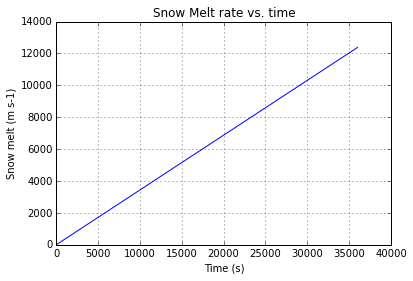

In [6]:
plt.plot(time,vol_SM,'b'); 
plt.xlabel('Time (s)')
plt.ylabel('Snow melt (m s-1)')
plt.title('Snow Melt rate vs. time')
plt.grid(); plt.show()